## Observations and Insights

## Dependencies and starter code

In [20]:
#The IQR Metrics were solutioned using a document found in WWW Jan 13 2020
#CodingMage/Matplotlib_HW -- only took what was needed to proceed

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset

In [21]:
# Combining both data sets into a single data set. Using Inner join - only interested in records that match 
#on both files

combined_data_df = pd.merge(mouse_metadata, study_results,how='inner', on='Mouse ID')
combined_data_df.head()



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [3]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

#Group Data
Tumor_Data_df = combined_data_df[['Drug Regimen','Tumor Volume (mm3)']]
Summary_Stats_df = Tumor_Data_df.groupby('Drug Regimen')
#Generate Summary Stats
Summary_Stats_Mean_df = Summary_Stats_df.mean().rename(columns = {'Tumor Volume (mm3)' : 'Mean'})
Summary_Stats_Median_df = Summary_Stats_df.median().rename(columns = {'Tumor Volume (mm3)' : 'Median'})
Summary_Stats_Var_df = Summary_Stats_df.var().rename(columns = {'Tumor Volume (mm3)' : 'Variance'})
Summary_Stats_StVar_df = Summary_Stats_df.std().rename(columns = {'Tumor Volume (mm3)' : 'StVar'})
Summary_Stats_SEM_df = Summary_Stats_df.sem().rename(columns = {'Tumor Volume (mm3)' : 'SEM'})
#Merge all datasets
combined_stats_df = pd.merge(Summary_Stats_Mean_df, Summary_Stats_Median_df, how="inner", on="Drug Regimen")
combined_stats_df = pd.merge(combined_stats_df, Summary_Stats_Var_df, how="inner", on="Drug Regimen")
combined_stats_df = pd.merge(combined_stats_df, Summary_Stats_StVar_df, how="inner", on="Drug Regimen")
Summary_Statistics_Table_df = pd.merge(combined_stats_df, Summary_Stats_SEM_df, how="inner", on="Drug Regimen")
Summary_Statistics_Table_df

,Mean,Median,Variance,StVar,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

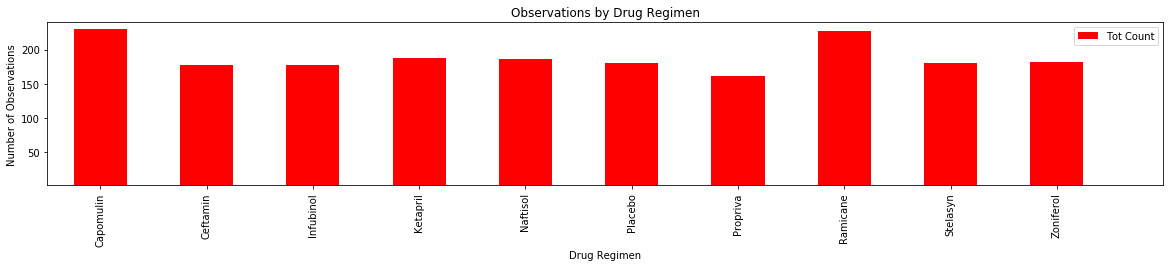

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

cnt_by_regimen_df = combined_data_df.groupby('Drug Regimen').count()[['Mouse ID']]
cnt_by_regimen_df  = cnt_by_regimen_df .rename(columns = {'Mouse ID' : 'Tot Count'})

x_axis = np.arange(len(cnt_by_regimen_df))
# Use DataFrame.plot() in order to create a bar chart of the data
cnt_by_regimen_df.plot(kind="bar", figsize=(20,3), color='red')

# Set x and y limits
plt.xlim(-0.5, len(x_axis))
plt.ylim(1, max(cnt_by_regimen_df["Tot Count"])+10)

# Set a title for the chart
plt.title("Observations by Drug Regimen")
plt.ylabel("Number of Observations")

plt.show()


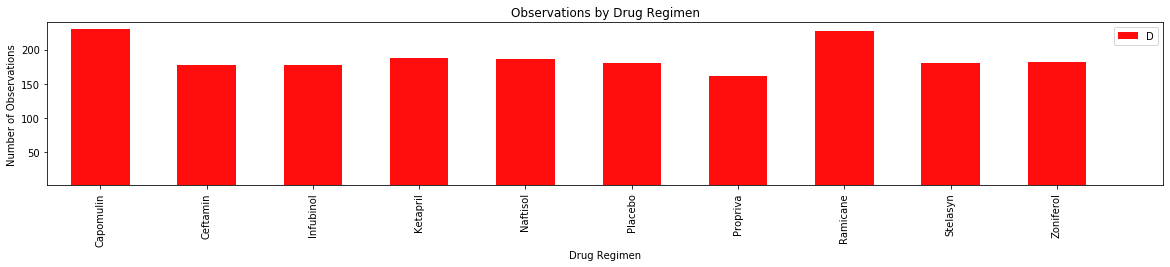

In [5]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
# Set x axis and tick locations

#Reset Index
cnt_by_regimen_df = cnt_by_regimen_df.reset_index()

x_axis = np.arange(len(cnt_by_regimen_df))
tick_locations = []
for x in x_axis:
    tick_locations.append(x)

plt.figure(figsize=(20,3))
plt.bar(x_axis, cnt_by_regimen_df["Tot Count"], width=0.55, color='r', alpha=0.95, align="center")
plt.xticks(tick_locations, cnt_by_regimen_df["Drug Regimen"], rotation="vertical")

# Set x and y limits
plt.xlim(-0.5, len(x_axis))
plt.ylim(1, max(cnt_by_regimen_df["Tot Count"])+10)

# Set a Title and labels
plt.title("Observations by Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Observations")
plt.legend("Drug Regimen", loc=1);  #This is not working
plt.show()

## Pie plots

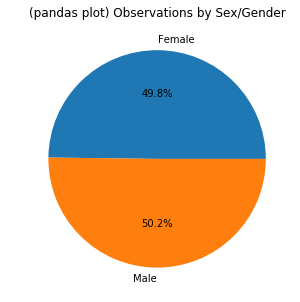

In [6]:
#Generate a pie plot using both Pandas's DataFrame.plot()

Cnt_by_Sex_df = combined_data_df.groupby('Sex')['Mouse ID'].nunique()
#Cnt_by_Sex_df = Cnt_by_Sex_df.reset_index()

pieplot = Cnt_by_Sex_df.plot.pie(y='Mouse ID', figsize=(5, 5),autopct='%1.1f%%', title="(pandas plot) Observations by Sex/Gender")  
pieplot.set_ylabel(' ');
plt.show()

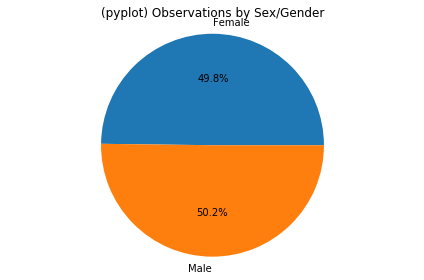

In [7]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

Cnt_by_Sex_df = combined_data_df.groupby('Sex')['Mouse ID'].nunique()
#Reset Index
Cnt_by_Sex_df = Cnt_by_Sex_df.reset_index()
plt.close
patches = plt.pie(Cnt_by_Sex_df['Mouse ID'],labels=Cnt_by_Sex_df['Sex'],autopct='%1.1f%%'
        
       )
plt.title("(pyplot) Observations by Sex/Gender")
plt.axis('equal')
plt.tight_layout()
plt.show()




## Quartiles, outliers and boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 

#Rename column name Tumor to Tumor Volume
#combined_data_df = combined_data_df.rename(columns = {'Tumor' : 'Tumor Volume'})
#Grab just the columns we need to work with
Tumor_Data_df = combined_data_df[['Mouse ID','Timepoint', 'Drug Regimen', 'Tumor Volume (mm3)']]

#Create list of chosen drugs
Chosen_Drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

#Grab top 4 Drug Regimens and reset the index, use the dataframe we created at beginning
Top_4_Regimen_df = Tumor_Data_df.loc[combined_data_df['Drug Regimen'].isin(Chosen_Drugs)]

#Get the mouseid's with the max value in timepoint.
Max_Timepoint_df = Top_4_Regimen_df.groupby('Mouse ID')[['Timepoint']].last()  #Could have use .max() also right?
#Reset Index (So we can merge this dataset to get correct tumor value)
Max_Timepoint_df = Max_Timepoint_df.reset_index()


#Merge both data sets to create one master dataset
Max_Timepoint_df = pd.merge(Top_4_Regimen_df,Max_Timepoint_df, on = ['Mouse ID','Timepoint'])

#Create final dataset
Final_Data_df = Max_Timepoint_df [['Mouse ID','Timepoint', 'Drug Regimen', 'Tumor Volume (mm3)']]


# This lists each mouse and final tumor volume
print(Final_Data_df) 


   Mouse ID  Timepoint Drug Regimen  Tumor Volume (mm3)
0      k403         45     Ramicane           22.050126
1      s185         45    Capomulin           23.343598
2      x401         45    Capomulin           28.484033
3      m601         45    Capomulin           28.430964
4      g791         45     Ramicane           29.128472
..      ...        ...          ...                 ...
95     x822         45     Ceftamin           61.386660
96     y163         45    Infubinol           67.685569
97     y769         45     Ceftamin           68.594745
98     y865         45     Ceftamin           64.729837
99     z581         45    Infubinol           62.754451

[100 rows x 4 columns]


In [9]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

#Now we need to obtain the IQR fields for each Drug Regimen. We will use a function and populate a list with the function
#This list will store all IQR data for Each Regimen
IQR_Top_4 = []
Outlier_Flag_List = [] #This stores wheter data was wihin outlier range or not
def IQR_Calculations(data_iqr):
    quartiles = data_iqr.quantile([0.25, 0.75])
    upper_q = quartiles[0.75]
    lower_q = quartiles[0.25]
    iqr = upper_q - lower_q
    upper_bound = upper_q+1.5*iqr
    lower_bound = lower_q-1.5*iqr
    upper_check = upper_bound - data_iqr
    lower_check = data_iqr-lower_bound
    #Whiz through dataframe and determine if we pass the outlier test or not. Set a flag until flag not true
    flag = True
    while flag:
        for j in range(len(upper_check)):
            if upper_check[j] > 0 and lower_check[j]>0:
                pass
            else:
                return [round(iqr,2), 'Yes']
                flag = False
                break
        break
    if flag:
        return [round(iqr,2), 'No']
    
all_regimens = Top_4_Regimen_df['Drug Regimen'].unique()

outlier_list = []

for i in range(len(all_regimens)):
    data_iqr = combined_data_df.loc[combined_data_df['Drug Regimen'] == all_regimens[i]].groupby('Mouse ID').last()['Tumor Volume (mm3)']
    IQR_Top_4.append(IQR_Calculations(data_iqr)[0])
    Outlier_Flag_List.append(IQR_Calculations(data_iqr)[1])
Final_IQR = pd.DataFrame(index=all_regimens, data={'IQR':IQR_Top_4,
                                                     'Passed Outlier Test':Outlier_Flag_List})
Final_IQR

,IQR,Passed Outlier Test
Ramicane,9.10,No
Capomulin,7.78,No
Infubinol,11.48,Yes
Ceftamin,15.58,No


<Figure size 576x432 with 0 Axes>

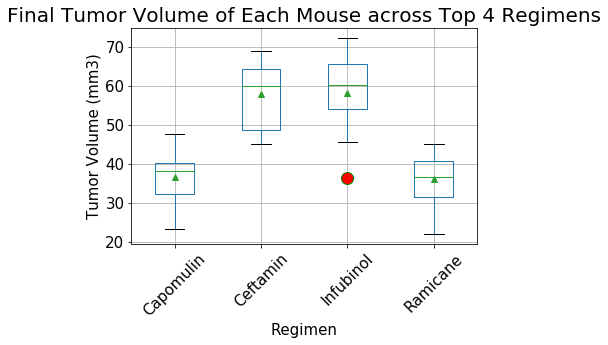

In [10]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
#Define outlier colors
plt.figure(figsize=(8,6))
flierprops = dict(marker='o', markerfacecolor='r', markersize=12,
                  linestyle='none', markeredgecolor='g')

ax = Final_Data_df.boxplot(column='Tumor Volume (mm3)', by='Drug Regimen', rot=45, fontsize=15, layout=None
                                ,showfliers=True,showmeans=True,
                                flierprops=flierprops)
# get rid of the automatic title and some addtional titles
plt.suptitle("")

ax.set_xlabel("Regimen", fontsize=15)
ax.set_ylabel("Tumor Volume (mm3)", fontsize=15)
ax.set_title("Boxplot of V1")
ax.set_title("Final Tumor Volume of Each Mouse across Top 4 Regimens",fontsize=20);




## Line and scatter plots

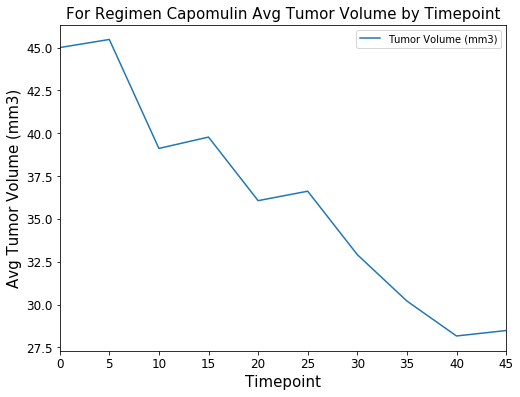

In [11]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
plt.figure(figsize=(8,6))
# From combined dataframe extraxt all Capomulin records
combined_data_cap_df = combined_data_df.loc[combined_data_df['Drug Regimen'] == 'Capomulin']
# Take Data for one mouse x401
combined_data_cap_df = combined_data_cap_df.loc[combined_data_cap_df['Mouse ID'] == 'x401']
tumor_vols_mean_df = combined_data_cap_df .groupby(["Drug Regimen", "Timepoint"]).mean()["Tumor Volume (mm3)"]

#Reset Index
tumor_vols_mean_df = tumor_vols_mean_df.reset_index()


# Now we can do a line plot
# gca stands for 'get current axis'
ax = plt.gca()

tumor_vols_mean_df .plot(kind='line',x='Timepoint',y='Tumor Volume (mm3)',ax=ax)
plt.title('For Regimen Capomulin Avg Tumor Volume by Timepoint', fontsize=15)
plt.xlabel("Timepoint",fontsize=15)
plt.ylabel("Avg Tumor Volume (mm3)", fontsize=15)
plt.xticks(size=12)
plt.yticks(size=12)
plt.show()


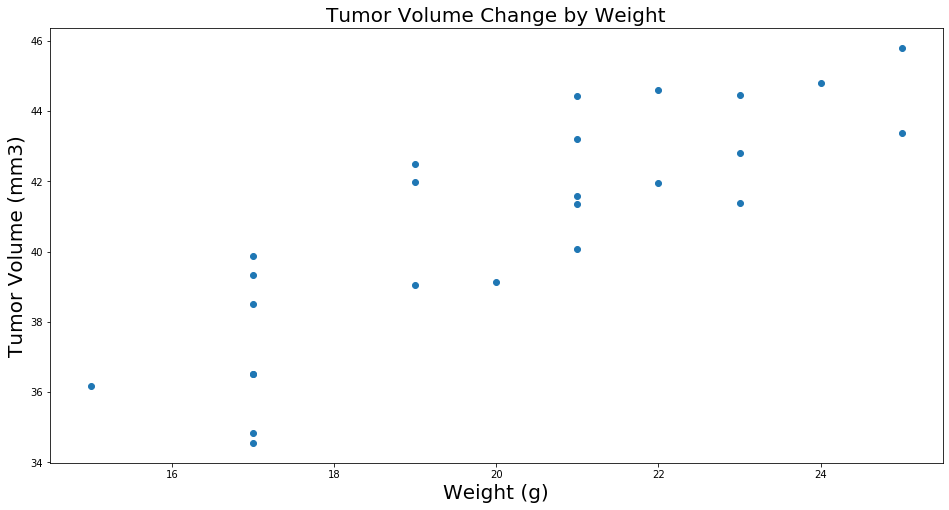

In [39]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

#1 Step just grab data for Capomulin, need timeplot, tumor volume and regimen

# From combined dataframe extraxt all Capomulin records
combined_data_cap_scat_df = combined_data_df.loc[combined_data_df['Drug Regimen'] == 'Capomulin']
combined_data_cap_scat_grp_df = combined_data_cap_scat_df.groupby('Mouse ID')

# Now take the mean of weights  and tumor
weights_mean_df = combined_data_cap_scat_grp_df['Weight (g)'].mean()
tumor_mean_df = combined_data_cap_scat_grp_df['Tumor Volume (mm3)'].mean()
tumor_mean_df 
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(weights_mean_df, tumor_mean_df )
ax.set_xlabel('Weight (g)',fontsize=20)
ax.set_ylabel('Tumor Volume (mm3)',fontsize=20)
ax.set_title("Tumor Volume Change by Weight",fontsize=20);
plt.show()



The correlation between mouse weight and tumor volumn for the Capomulin regimen is 0.84


(array([32., 34., 36., 38., 40., 42., 44., 46., 48.]),
 <a list of 9 Text yticklabel objects>)

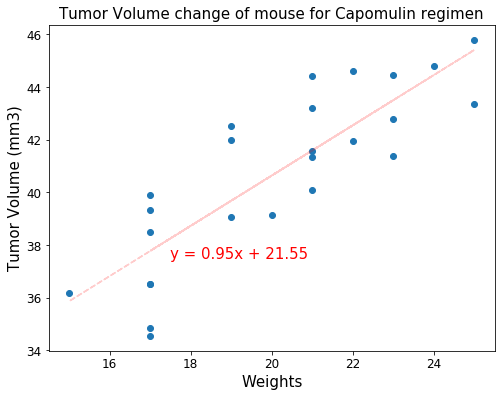

In [45]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(weights_mean_df, tumor_mean_df)
print(f"The correlation between mouse weight and tumor volumn for the Capomulin regimen is {round(correlation[0],2)}")

# Making the regression model
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(weights_mean_df, tumor_mean_df)
regress_values = weights_mean_df * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the linear model with scatter plot
plt.figure(figsize=(8,6))
plt.scatter(weights_mean_df, tumor_mean_df)
plt.plot(weights_mean_df, regress_values, 'r--', alpha=0.2)
plt.annotate(line_eq,(17.5,37.5),fontsize=15,color="red")
plt.xlabel('Weights', size=15)
plt.ylabel('Tumor Volume (mm3)', size=15)
plt.title('Tumor Volume change of mouse for Capomulin regimen', size=15)
plt.xticks(size=12)
plt.yticks(size=12)

# The correlation coefficient is a statistical measure that calculates the strength of the relationship 
# between the relative movements of two variables. The values range between -1.0 and 1.0. 
# A calculated number greater than 1.0 or less than -1.0 means that there was an error in 
# the correlation measurement. A correlation of -1.0 shows a perfect negative correlation, while a 
# correlation of 1.0 shows a perfect positive correlation. A correlation of 0.0 shows no relationship between
# the movement of the two variables.
